In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import tensorflow as tf
import os
!pip install pyngrok
from pyngrok import ngrok


from flask import Flask, render_template_string, request
from pyngrok import ngrok
from pyngrok import ngrok

# Check TensorFlow version
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
if __name__ == '__main__':
  app = Flask(__name__)




TensorFlow version: 2.17.0


In [ ]:
# Ensure required directory exists
os.makedirs('/content', exist_ok=True)
df= pd.read_csv("/content/TRAFFIC_DATA.csv")
df

,timestamp,zone,vehicle_count,avg_speed,traffic_density,event,crowd_size,event_zone,event_duration,weather_condition,temperature,visibility,road_condition,maintenance_work,public_transport_status,surge_pricing,latitude,longitude,altitude,road_width
0,01-01-2024 00:00,zone1,280.000000,41.618878,298,sports match,22050,zone5,1,storm,34.411409,46.692807,normal,False,delayed,0.305911,40.709558,-74.012229,335.106448,11.316029
1,01-01-2024 00:00,zone2,32.783791,49.599189,366,concert,20018,zone2,2,clear,32.809166,74.551171,accident,True,delayed,1.959962,34.061572,-118.251504,321.487073,12.061609
2,01-01-2024 00:00,zone3,142.553539,84.718597,286,conference,21548,zone1,3,rain,26.870429,3.106786,normal,True,on-time,0.125522,41.882067,-87.636344,337.336458,4.999346
3,01-01-2024 00:00,zone4,110.861088,106.268678,225,concert,13610,zone4,3,clear,13.982181,53.541058,normal,False,delayed,1.534334,29.763372,-95.379769,323.175344,20.000590
4,01-01-2024 00:00,zone5,107.397384,46.760665,141,movie release,45685,zone6,3,snow,12.217524,86.009432,road blockage,False,on-time,0.213348,33.442173,-112.073535,319.783101,5.000810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,31-12-2024 23:00,zone2,105.296681,73.820686,109,political summit,35653,zone1,1,snow,6.672817,79.501175,road blockage,False,delayed,0.688010,34.055878,-118.251993,320.763293,12.060440
52700,31-12-2024 23:00,zone3,232.285526,48.057658,108,festival,2482,zone3,1,snow,32.926460,84.308639,road blockage,True,cancelled,1.753001,41.887141,-87.629187,334.455800,4.999264
52701,31-12-2024 23:00,zone4,23.060993,102.201358,186,sports match,17665,zone6,2,storm,33.394837,49.757866,accident,False,delayed,2.858070,29.760852,-95.377395,320.836292,20.000324
52702,31-12-2024 23:00,zone5,74.274895,72.674941,421,festival,17841,zone1,1,rain,9.029451,61.896381,road blockage,True,delayed,0.252414,33.452307,-112.075268,324.931954,4.999080


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52704 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   zone                     52704 non-null  object 
 1   vehicle_count            52704 non-null  float64
 2   avg_speed                52704 non-null  float64
 3   traffic_density          52704 non-null  int64  
 4   event                    52704 non-null  object 
 5   crowd_size               52704 non-null  int64  
 6   event_zone               52704 non-null  object 
 7   event_duration           52704 non-null  int64  
 8   weather_condition        52704 non-null  object 
 9   temperature              52704 non-null  float64
 10  visibility               52704 non-null  float64
 11  road_condition           52704 non-null  object 
 12  maintenance_work         52704 non-null  bool   
 13  public_transport_status  52704 non-null  

<ipython-input-17-033ccf5dddb6>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0536 - val_loss: 0.0351
Epoch 2/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0364 - val_loss: 0.0348
Epoch 3/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0351 - val_loss: 0.0342
Epoch 4/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0349 - val_loss: 0.0358
Epoch 5/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0349 - val_loss: 0.0344
Epoch 6/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0346 - val_loss: 0.0341
Epoch 7/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0348 - val_loss: 0.0341
Epoch 8/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0344 - val_loss: 0.0341
Epoch 9/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0342 - val_loss: 0.0341
Epoch 10/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0342 - val_loss: 0.0342
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


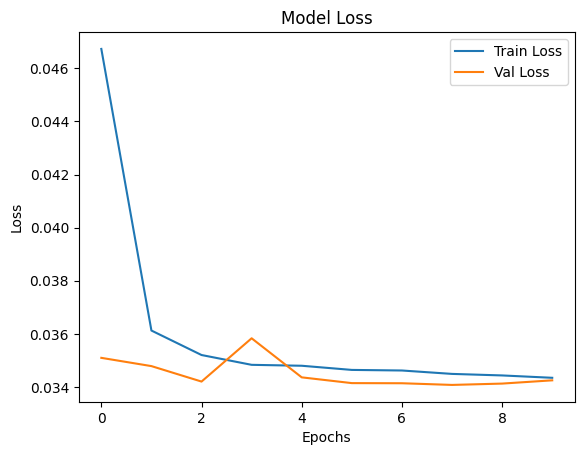


Timestamp: 2024/01/01 00:00
Predicted Congestion: 22.63          , Current Zone: zone1     , Suggested Rerouting Zone: zone5          
Predicted Congestion: 24.12          , Current Zone: zone2     , Suggested Rerouting Zone: zone1          
Predicted Congestion: 10.00          , Current Zone: zone3     , Suggested Rerouting Zone: zone5          
Predicted Congestion: 40.00          , Current Zone: zone4     , Suggested Rerouting Zone: zone4          
Predicted Congestion: 10.00          , Current Zone: zone5     , Suggested Rerouting Zone: zone5          
Predicted Congestion: 30.00          , Current Zone: zone6     , Suggested Rerouting Zone: zone1          

Timestamp: 2024/01/01 01:00
Predicted Congestion: 22.63          , Current Zone: zone1     , Suggested Rerouting Zone: zone5          
Predicted Congestion: 24.12          , Current Zone: zone2     , Suggested Rerouting Zone: zone1          
Predicted Congestion: 10.00          , Current Zone: zone3     , Suggested Rerouting Z

<ipython-input-17-033ccf5dddb6>:107: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Current Zone: {df['zone'][i]:<10}, "
<ipython-input-17-033ccf5dddb6>:129: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['zone5', 'zone1', 'zone5', 'zone4', 'zone5', 'zone1', 'zone5', 'zone1', 'zone5', 'zone4', 'zone4', 'zone1', 'zone5', 'zone1', 'zone5', 'zone5', 'zone5', 'zone1', 'zone5', 'zone1', 'zone4', 'zone5', 'zone5', 'zone6', 'zone5', 'zone1', 'zone4', 'zone4', 'zone5', 'zone6', 'zone5', 'zone1', 'zone4', 'zone5', 'zone5', 'zone1', 'zone5', 'zone1', 'zone4', 'zone5', 'zone5', 'zone1', 'zone5', 'zone1', 'zone5', 'zone4', 'zone4', 'zone1', 'zone5', 'zone1', 'zone4', 'zone4', 'zone4', 'zone6', 'zone5', 'zone1', 'zone5', 'zone5', '

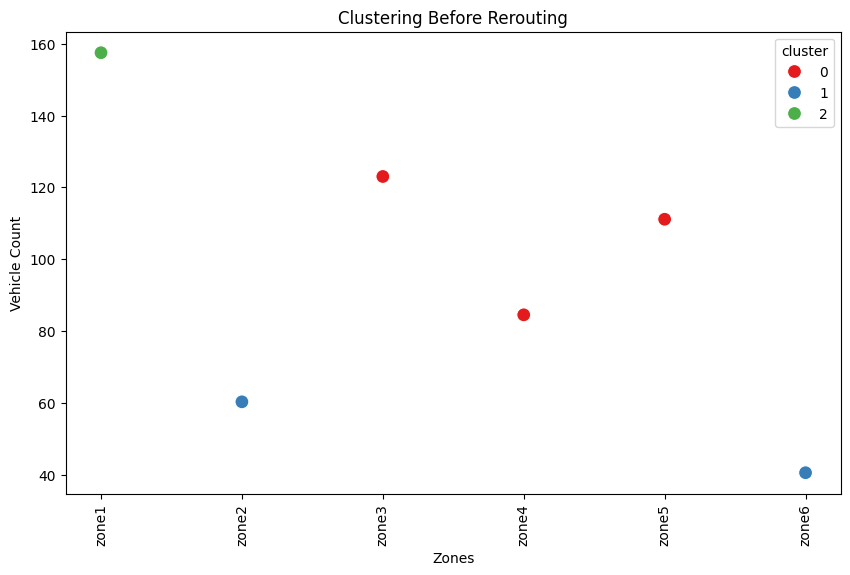

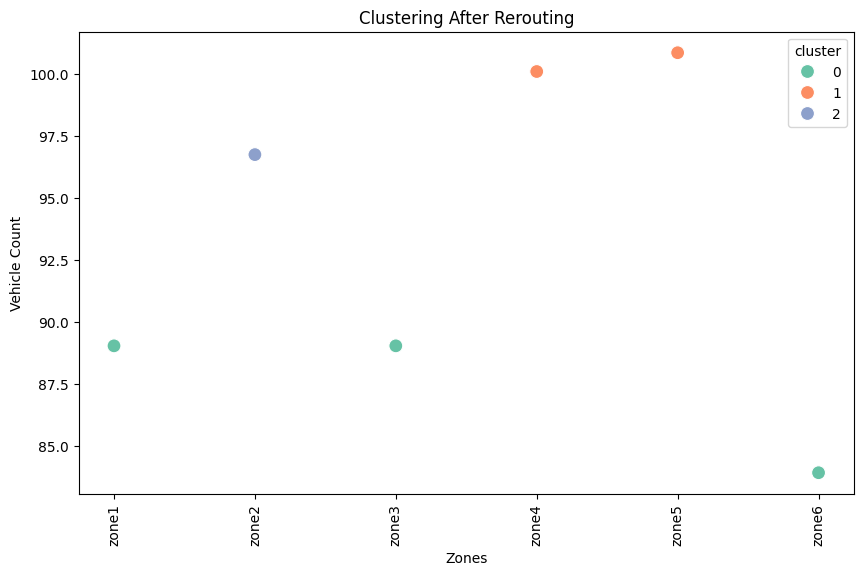

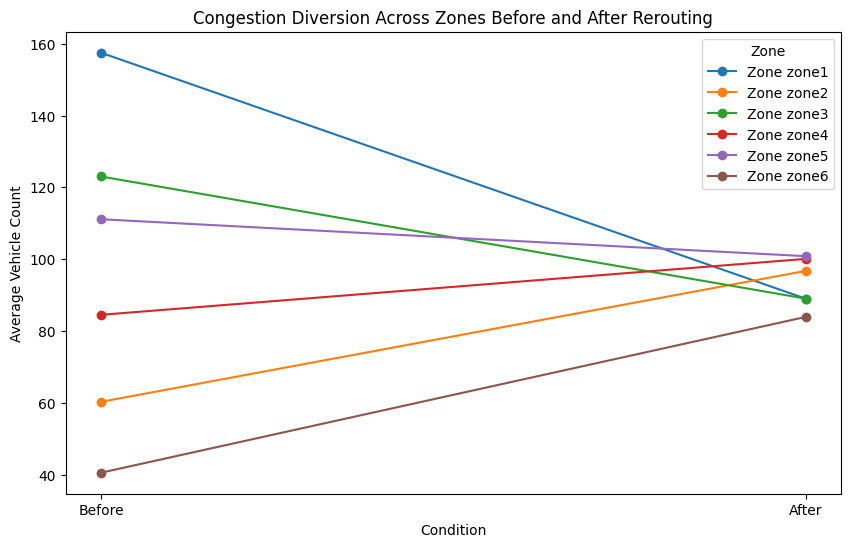

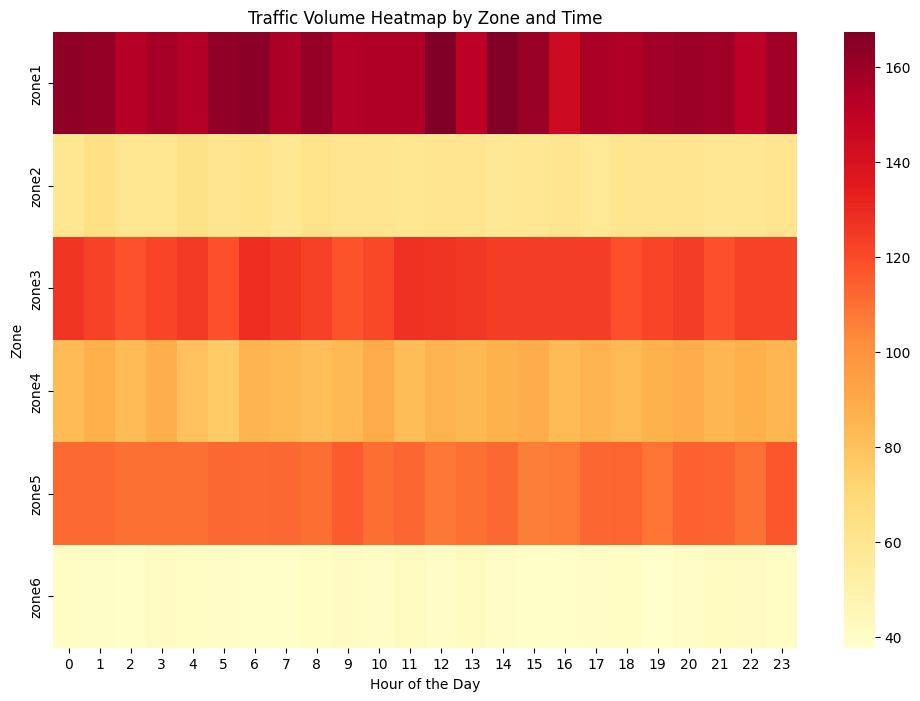

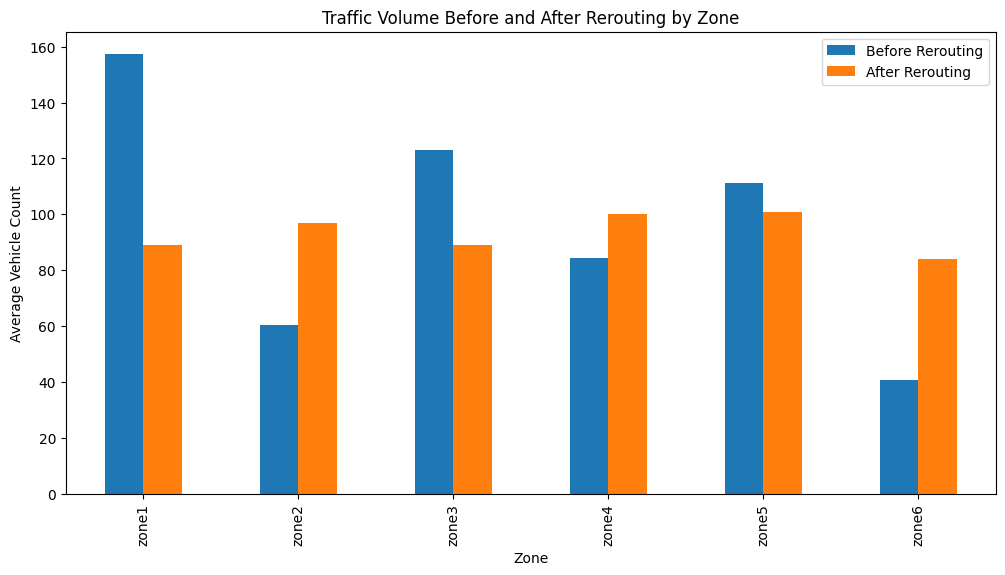

Traffic Report for 2024-01-01 00:00:00:

    Traffic Report:
    At 2024-01-01 00:00:00, the congestion level in zone1 is 100.0%. 
    Rerouting is suggested to zone5. The maximum road capacity is 22.63044814 vehicles. 
    Before rerouting, there were 280.0 vehicles, and after rerouting, there are 22.63044814 vehicles.
    

Traffic Report for 2024-01-01 00:00:00:

    Traffic Report:
    At 2024-01-01 00:00:00, the congestion level in zone2 is 100.0%. 
    Rerouting is suggested to zone1. The maximum road capacity is 24.123723 vehicles. 
    Before rerouting, there were 32.78379121 vehicles, and after rerouting, there are 24.123723 vehicles.
    

Traffic Report for 2024-01-01 00:00:00:

    Traffic Report:
    At 2024-01-01 00:00:00, the congestion level in zone3 is 100.0%. 
    Rerouting is suggested to zone5. The maximum road capacity is 10.001613124 vehicles. 
    Before rerouting, there were 142.5535391 vehicles, and after rerouting, there are 10.001613124 vehicles.
    

Traffi

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df.set_index('timestamp', inplace=True)
df.info()
df.head()


# Check for missing values and fill them with forward-fill method
df.fillna(method='ffill', inplace=True)


features = ['vehicle_count', 'avg_speed', 'traffic_density', 'event', 'crowd_size',
            'weather_condition', 'temperature', 'road_condition', 'zone',
            'latitude', 'longitude', 'altitude', 'road_width']

# Separate categorical and numerical features, including geographic and road width
categorical_features = ['event', 'weather_condition', 'road_condition']
numerical_features = ['vehicle_count', 'avg_speed', 'traffic_density', 'crowd_size',
                      'temperature', 'latitude', 'longitude', 'altitude', 'road_width']


encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(df[categorical_features])


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_numerical = scaler.fit_transform(df[numerical_features])


data = np.concatenate([scaled_numerical, encoded_cats], axis=1)


def get_max_vehicle_capacity(road_width):
    # Assume each meter of road width can accommodate up to 2 vehicles
    return road_width * 2


def create_sequences_with_capacity(data, seq_length, road_widths):
    sequences = []
    labels = []
    capacities = []
    for i in range(seq_length, len(data)):
        sequences.append(data[i-seq_length:i])
        labels.append(data[i][0])  # vehicle count as the label
        capacities.append(get_max_vehicle_capacity(road_widths[i]))  # Calculate capacity
    return np.array(sequences), np.array(labels), np.array(capacities)


road_widths = df['road_width'].values
SEQ_LENGTH = 60
X, y, max_capacities = create_sequences_with_capacity(data, SEQ_LENGTH, road_widths)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)

predicted_congestion_rescaled = scaler.inverse_transform(
    np.concatenate((predictions, X_test[:, -1, 1:len(numerical_features)]), axis=1)
)[:, 0]


predicted_congestion_adjusted = np.minimum(predicted_congestion_rescaled, max_capacities[:len(predicted_congestion_rescaled)])

zones = df['zone'].unique()


rerouted_zones = [zones[(int(cong) + 1) % len(zones)] if cong > max_capacities[i]
                  else zones[int(cong) % len(zones)]
                  for i, cong in enumerate(predicted_congestion_adjusted)]


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Convert index (timestamp) to list to access it easily
timestamps = df.index.tolist()
current_timestamp = None
# Displays Congestion & Rerouting details for the first 24 hours
for i in range(24*6):
    if timestamps[i] != current_timestamp:
        current_timestamp = timestamps[i]
        print(f"\nTimestamp: {current_timestamp.strftime('%Y/%m/%d %H:%M')}")

    print(f"Predicted Congestion: {predicted_congestion_adjusted[i]:<15.2f}, "
          f"Current Zone: {df['zone'][i]:<10}, "
          f"Suggested Rerouting Zone: {rerouted_zones[i]:<15}")


predictions_df = pd.DataFrame({
    'timestamp': df.index[:len(predicted_congestion_adjusted)],
    'congestion_level': predicted_congestion_adjusted / max_capacities[:len(predicted_congestion_adjusted)],  # Normalized congestion level
    'zone': df['zone'][:len(predicted_congestion_adjusted)],
    'rerouted_zone': rerouted_zones[:len(predicted_congestion_adjusted)],
    'max_capacity': max_capacities[:len(predicted_congestion_adjusted)],
    'vehicle_count_before': df['vehicle_count'][:len(predicted_congestion_adjusted)],
    'vehicle_count_after': np.minimum(predicted_congestion_adjusted, max_capacities[:len(predicted_congestion_adjusted)]),
})


predictions_csv_path = '/content/prediction.csv'  # Specify your desired path
predictions_df.to_csv(predictions_csv_path, index=False)

print(f"Predictions saved to {predictions_csv_path}")


df['rerouted_zones'] = np.nan  # Initialize with NaN
df.iloc[-len(rerouted_zones):, df.columns.get_loc('rerouted_zones')] = rerouted_zones


before_rerouting_data = df.groupby('zone')[['vehicle_count', 'latitude', 'longitude', 'altitude']].mean().reset_index()
after_rerouting_data = df.groupby('rerouted_zones')[['vehicle_count', 'latitude', 'longitude', 'altitude']].mean().reset_index()


print(before_rerouting_data.head())
print(after_rerouting_data.head())


kmeans_before = KMeans(n_clusters=3, random_state=42)
before_rerouting_data['cluster'] = kmeans_before.fit_predict(before_rerouting_data[['vehicle_count', 'latitude', 'longitude', 'altitude']])


plt.figure(figsize=(10, 6))
sns.scatterplot(x=before_rerouting_data['zone'],
                y=before_rerouting_data['vehicle_count'],
                hue=before_rerouting_data['cluster'],
                palette='Set1', s=100)
plt.xlabel("Zones")
plt.ylabel("Vehicle Count")
plt.title("Clustering Before Rerouting")
plt.xticks(rotation=90)
plt.show()


if len(rerouted_zones) < len(df):
    rerouted_zones = np.resize(rerouted_zones, len(df))
elif len(rerouted_zones) > len(df):
    rerouted_zones = rerouted_zones[:len(df)]


df['rerouted_zone'] = rerouted_zones


after_rerouting_data = df.groupby('rerouted_zone')['vehicle_count'].mean().reset_index()


if len(after_rerouting_data) >= 3:
    kmeans_after = KMeans(n_clusters=3, random_state=42)
    after_rerouting_data['cluster'] = kmeans_after.fit_predict(after_rerouting_data[['vehicle_count']])
else:
    print(f"Not enough samples for KMeans clustering. Available samples: {len(after_rerouting_data)}")
    after_rerouting_data['cluster'] = np.zeros(len(after_rerouting_data))  # Assign all to one cluster if not enough samples


plt.figure(figsize=(10, 6))
sns.scatterplot(x=after_rerouting_data['rerouted_zone'],
                y=after_rerouting_data['vehicle_count'],
                hue=after_rerouting_data['cluster'],
                palette='Set2', s=100)
plt.xlabel("Zones")
plt.ylabel("Vehicle Count")
plt.title("Clustering After Rerouting")
plt.xticks(rotation=90)
plt.show()


before_rerouting_data = df.groupby('zone')['vehicle_count'].mean().reset_index()
after_rerouting_data = df.groupby('rerouted_zone')['vehicle_count'].mean().reset_index()


comparison_data = before_rerouting_data.merge(after_rerouting_data, left_on='zone', right_on='rerouted_zone', suffixes=('_before', '_after'))


plt.figure(figsize=(10, 6))
for zone in comparison_data['zone']:
    zone_data = comparison_data[comparison_data['zone'] == zone]
    plt.plot(['Before', 'After'],
             [zone_data['vehicle_count_before'].values[0], zone_data['vehicle_count_after'].values[0]],
             marker='o', label=f'Zone {zone}')
plt.title("Congestion Diversion Across Zones Before and After Rerouting")
plt.xlabel("Condition")
plt.ylabel("Average Vehicle Count")
plt.legend(title='Zone')


plt.figure(figsize=(12, 8))
traffic_pivot = df.pivot_table(values='vehicle_count', index='zone', columns=df.index.hour, aggfunc='mean')
sns.heatmap(traffic_pivot, cmap='YlOrRd')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone')
plt.title('Traffic Volume Heatmap by Zone and Time')
plt.show()


comparison_data.set_index('zone', inplace=True)
comparison_data[['vehicle_count_before', 'vehicle_count_after']].plot(kind='bar', figsize=(12, 6))
plt.xlabel('Zone')
plt.ylabel('Average Vehicle Count')
plt.title('Traffic Volume Before and After Rerouting by Zone')
plt.legend(['Before Rerouting', 'After Rerouting'])
plt.show()


def generate_traffic_report(timestamp, congestion_level, zone, rerouted_zone, max_capacity, vehicle_count_before, vehicle_count_after):
    report = f"""
    Traffic Report:
    At {timestamp}, the congestion level in {zone} is {congestion_level*100:.1f}%.
    Rerouting is suggested to {rerouted_zone}. The maximum road capacity is {max_capacity} vehicles.
    Before rerouting, there were {vehicle_count_before} vehicles, and after rerouting, there are {vehicle_count_after} vehicles.
    """
    return report


for index, row in predictions_df.head(10).iterrows():
    timestamp = row['timestamp']
    congestion_level = row['congestion_level']
    zone = row['zone']
    rerouted_zone = row['rerouted_zone']
    max_capacity = row['max_capacity']
    vehicle_count_before = row['vehicle_count_before']
    vehicle_count_after = row['vehicle_count_after']


    traffic_report = generate_traffic_report(timestamp, congestion_level, zone, rerouted_zone, max_capacity, vehicle_count_before, vehicle_count_after)
    print(f"Traffic Report for {timestamp}:\n{traffic_report}\n")ine feature sets
# Define the features inclu